# About this notebook

This notebook is to showcase features currently in development for the tiatoolbox.

# Welcome to Tiatoolbox

In this example, we will show two models in developements for making semantic segmentation and nucleus instance segmentation using deep learning model. These Tiatoolbox models can be applied directly on WSI or tiles, the library will handle all the patch extraction, post-processing, and patch reassembling internally. Herein we introduce
- `NucleusInstanceSegmentor` : dedicated for nucleus instance segmentation methods such as `HoVernet`, or `UNet`.
- `SemanticSegmentor` : dedicated for generic FCN methods for semantic segmentation methods.

Both of them can be run in the same way as the *Patch Prediction Models* notebook has shown.

pip install git+https://github.com/TIA-Lab/tiatoolbox.git@feature-model-segmentation

## First cell in the bash

## Importing related libraries

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300 # for high resolution figure in notebook

from tiatoolbox.wsicore.wsireader import get_wsireader
from tiatoolbox.utils.visualisation import visualize_instances_dict
from tiatoolbox.utils.misc import download_data, imread
from tiatoolbox.models.segmentation import NucleusInstanceSegmentor, SemanticSegmentor

# Downloading the samples

We will now download an image tile at 20x, a mini WSI with 20x magnification as baseline, and their masks if available as samples for illustrating these modules functionalities.

In [2]:
sample_url = ("https://tiatoolbox.dcs.warwick.ac.uk/testdata/"
                   "patchextraction/TCGA-HE-7130-01Z-00-DX1.png")
sample_tile_path = 'sample_tile.png'
download_data(sample_url, sample_tile_path)

# TODO: need to upload svs and replace
sample_url = ("https://tiatoolbox.dcs.warwick.ac.uk/testdata/"
                   "patchextraction/TCGA-HE-7130-01Z-00-DX1.png")
sample_wsi1_path = '/home/tialab-dang/local/project/tiatoolbox/tests/data/CMU-mini_002.svs'
sample_wsi1_mask_path = '/home/tialab-dang/local/project/tiatoolbox/tests/data/CMU-mini_002-mask.png'
# download_data(sample_url, sample_wsi1_path)

sample_wsi2_path = '/home/tialab-dang/local/project/tiatoolbox/tests/data/PCA-mini.svs'


Download from https://tiatoolbox.dcs.warwick.ac.uk/testdata/patchextraction/TCGA-HE-7130-01Z-00-DX1.png
Save to sample_tile.png


# Nucleus Instance Segmentation

Subsequently, we showcase how to instantiate `NucleusInstanceSegmentor` and make a prediction on a tile or a WSI. By default, the model will extract patches such that the output cover the entire input tile/wsi. The predictor will return a list of dictionaries, each is an output of the correspond input sample. Each dictionary contain following key and sub dictionary:
- `Inst_ID`:
    - `bbox` : the bounding box of this nuclei instance in the requested prediction resolution.
    - `centroid` : the centroid of this nuclei instance in the requested prediction resolution.
    - `contour` : the contour of this nuclei instance in the requested prediction resolution.
    - `type` : the type of this nuclei.
    - `type_prob` : the probability the model predict.

In [3]:
predictor = NucleusInstanceSegmentor(pretrained_model='hovernet-pannuke')

## Predicting on Image Tiles

Image tile will be treated as a pseudo WSI but with only baseline level and containing no mpp information. Hence, we must request the model to predict at resolution=1.0 and units='baseline'. We perform the prediction and plot the overlay of the output.


|2021-05-19|13:18:33.894| [WARNING] ../tiatoolbox/wsicore/wsimeta.py:155: UserWarning: Raw data is None
  warnings.warn("Raw data is None")

|2021-05-19|13:18:33.897| [WARNING] ../tiatoolbox/wsicore/wsimeta.py:158: UserWarning: Unknown scale (no objective_power or mpp)
  warnings.warn("Unknown scale (no objective_power or mpp)")


Fwrd-Tile:   0%|                                          | 0/1 [00:00<?, ?it/s]

Fwrd-Btch: 100%|##################################| 7/7 [00:01<00:00,  4.51it/s]

Post-Proc:   0%|                                          | 0/1 [00:07<?, ?it/s]
|2021-05-19|13:18:41.505| [INFO] Proc Grid: 7.596152967773378

Fwrd-Tile: 0it [00:00, ?it/s]

Fwrd-Tile: 0it [00:00, ?it/s]
Post-Proc: 0it [00:00, ?it/s]
|2021-05-19|13:18:41.530| [INFO] Proc XSect: 0.024196830578148365
dict_keys(['bbox', 'centroid', 'contour', 'type_prob', 'type'])


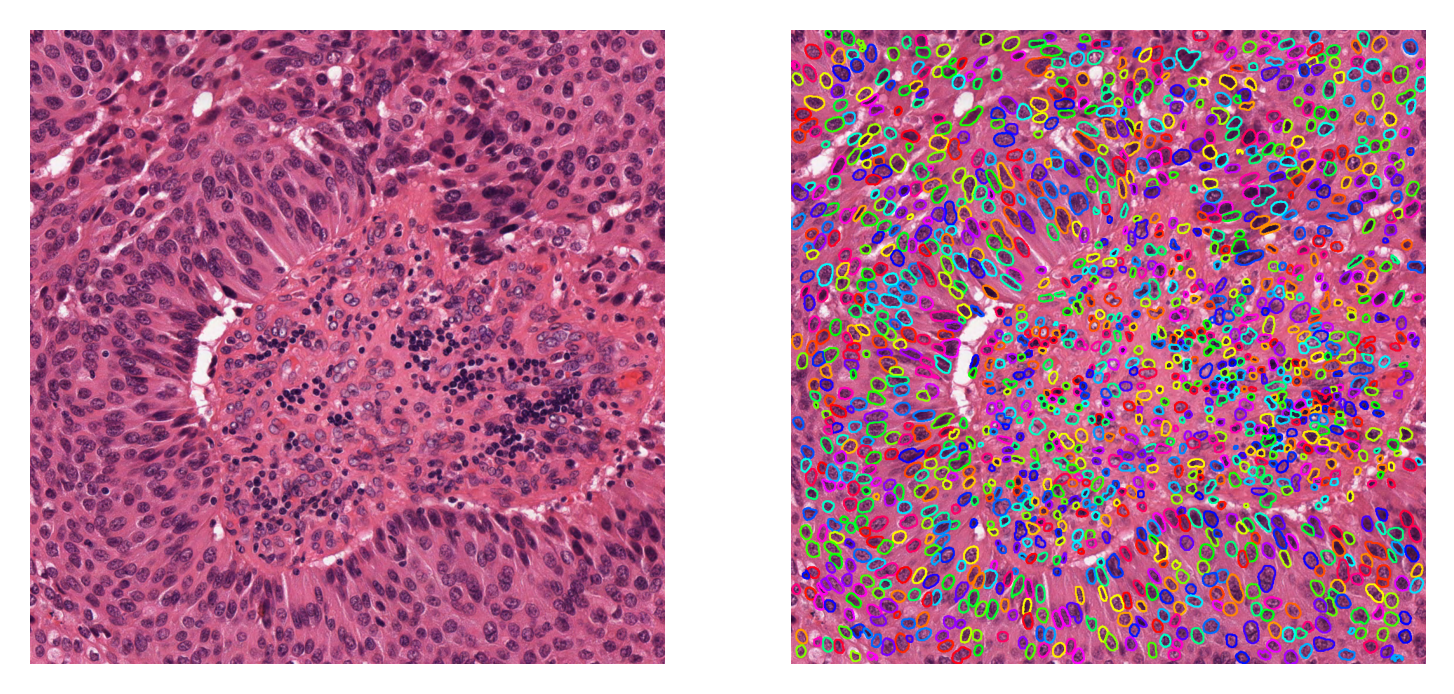

In [11]:
output = predictor.predict([sample_tile_path], mask_list=None, mode='tile', 
                        resolution=1.0, units='baseline', on_gpu=True)
print(output[list(output.keys())[0]].keys())

sample = imread(sample_tile_path)
overlay = visualize_instances_dict(sample, output, line_thickness=2)

plt.subplot(1,2,1)
plt.imshow(sample)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(overlay)
plt.axis('off')
plt.show()

Prediction on WSI can be done in the same way, however, we can change the read resolution to any other units. For this example, we read the WSI at mpp=0.25 (or 40x so to speak) with arguments `resolution=0.25`, `units='mpp'`. This is also the resolution which the `hovernet-pannuke` model was pretrained on.

In [12]:
output = predictor.predict([sample_wsi1_path], [sample_wsi1_mask_path], mode='wsi', 
                        resolution=0.25, units='mpp', on_gpu=True)

|2021-05-19|13:19:54.237| [WARNING] ../tiatoolbox/wsicore/wsireader.py:238: UserWarning: Read: Scale > 1.This means that the desired resolution is higher than the WSI baseline (maximum encoded resolution). Interpolation of read regions may occur.
  "Read: Scale > 1."


Fwrd-Tile:   0%|                                          | 0/5 [00:00<?, ?it/s]

Fwrd-Btch: 100%|################################| 39/39 [00:09<00:00,  4.32it/s]

Fwrd-Btch: 100%|##################################| 8/8 [00:01<00:00,  4.83it/s]

Fwrd-Btch: 100%|################################| 10/10 [00:02<00:00,  4.94it/s]

Fwrd-Btch: 100%|##################################| 7/7 [00:01<00:00,  4.97it/s]

Fwrd-Btch: 100%|##################################| 7/7 [00:01<00:00,  4.67it/s]

Post-Proc:   0%|                                          | 0/5 [00:28<?, ?it/s]
|2021-05-19|13:20:23.294| [INFO] Proc Grid: 28.883577063679695

Fwrd-Tile:   0%|                                          | 0/1 [00:00<?, ?it/s]

Fwrd-Btch: 

Now we overlay the prediction on the WSI. Note, we need to read the WSI via a WSIReader via `get_wsireader` to get a thumbnail for overlaying. The thumbnail must be read in same resolution as one the model makes predictions on. We only show the top-left 1024x1024 of the thumbnail because it the image will be too small to see the prediction when using the entire image.

|2021-05-18|14:31:48.561| [WARNING] ../tiatoolbox/wsicore/wsireader.py:238: UserWarning: Read: Scale > 1.This means that the desired resolution is higher than the WSI baseline (maximum encoded resolution). Interpolation of read regions may occur.
  "Read: Scale > 1."



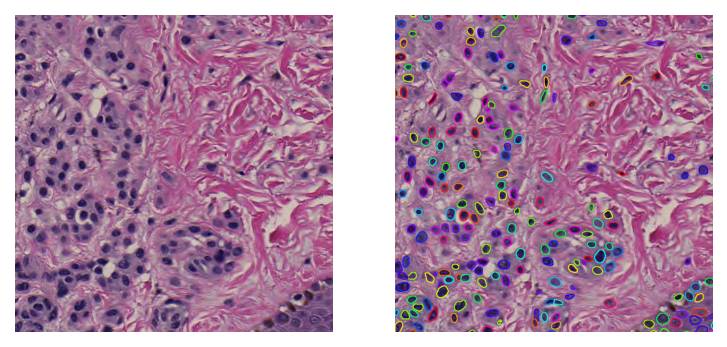

In [9]:
reader = get_wsireader(sample_path)
thumbnail = reader.slide_thumbnail(resolution=0.25, units='mpp')
overlay = visualize_instances_dict(sample, output, line_thickness=2)
thumbnail = thumbnail[:1024, :1024]
overlay = overlay[:1024, :1024]
plt.subplot(1,2,1)
plt.imshow(thumbnail)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(overlay)
plt.axis('off')
plt.show()

## Tissue Semantic Segmentation

In the same way as `NucleiInstanceSegmentor`, semantic segmentation on WSI and tile can be done in the same way. Here, we illustrate using our pretrained tissue mask segmentation to get the tissue mask for a WSI. The predictor will return a binary mask at prediction resolution. 

Note, user can change the post-proccessing to determine how their results are return. (WIP)

In [13]:
predictor = SemanticSegmentor(pretrained_model='fcn-tissue_mask')

Process Batch: 100%|############################| 23/23 [00:20<00:00,  1.15it/s]


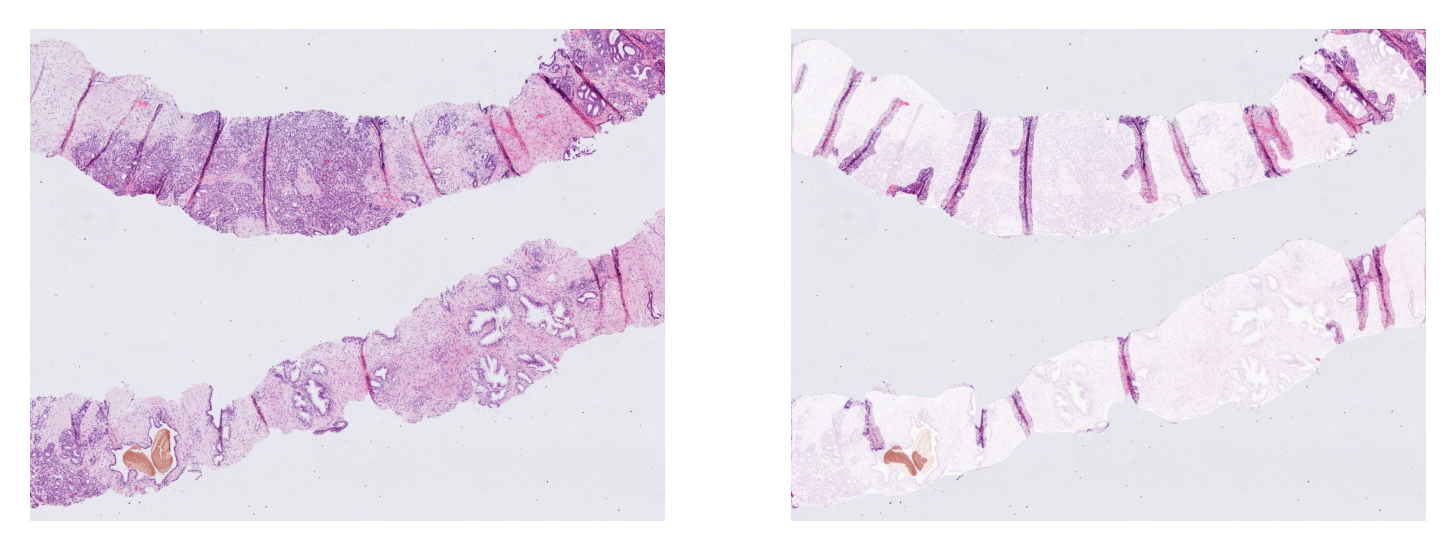

In [15]:
output = predictor.predict([sample_wsi2_path], mode='wsi', 
                        resolution=1.0, units='mpp', on_gpu=True)

reader = get_wsireader(sample_wsi2_path)
thumbnail = reader.slide_thumbnail(resolution=1.0, units='mpp')

sel = output > 0
alpha = 0.25
colorize_output = (output * 255)[...,None]
overlay = thumbnail.copy()
overlay[sel] = thumbnail[sel] * alpha + (1-alpha) * colorize_output[sel]

plt.subplot(1,2,1)
plt.imshow(thumbnail)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(overlay)
plt.axis('off')
plt.show()

We can see that the model can single out tissue folding artifacts.